In [1]:
import os
os.getcwd()

'g:\\My projects\\SpotifyTrendsAnalyzer\\Notebook'

In [3]:
#importing all the requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


In [8]:


# Try different encodings
df = pd.read_csv('../Data_set/spotify_songs_cleaned.csv', encoding='ISO-8859-1')



In [9]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.6,9.44,140.03,2:30
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990.0,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.0,23.50,135.90,3:58
2,#1 Stunna,Big Tymers,48,I Got That Work,2000.0,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.8,56.10,89.02,4:41
3,#NAKAMA,XLII,26,#NAKAMA,2019.0,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.8,56.80,108.04,3:12
4,#Natural,Paty Cant?§,50,#Natural,2017.0,latin hip hop,latin,latin hip hop,80.0,83.6,0,-3.54,0,5.68,11.400000,13.4,81.60,97.02,3:47


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         26158 non-null  object 
 1   track_artist       26158 non-null  object 
 2   track_popularity   26159 non-null  int64  
 3   track_album_name   26158 non-null  object 
 4   released_year      26159 non-null  float64
 5   playlist_name      26159 non-null  object 
 6   playlist_genre     26159 non-null  object 
 7   playlist_subgenre  26159 non-null  object 
 8   danceability       26159 non-null  float64
 9   energy             26159 non-null  float64
 10  key                26159 non-null  int64  
 11  loudness           26159 non-null  float64
 12  mode               26159 non-null  int64  
 13  speechiness        26159 non-null  float64
 14  acousticness       26159 non-null  float64
 15  liveness           26159 non-null  float64
 16  valence            261

In [11]:
# Fill missing values with the median year
df['released_year'].fillna(df['released_year'].median(), inplace=True)


C:\Users\Shaminda Kanchana\AppData\Local\Temp\ipykernel_11320\3827076969.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
# Convert duration from "min:sec" to seconds
def duration_to_seconds(duration):
    minutes, seconds = map(float, duration.split(':'))
    return minutes * 60 + seconds

df['duration'] = df['duration'].apply(duration_to_seconds)


In [15]:
df.describe(include='all')

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
count,26158,26158,26159.000000,26158,26159.000000,26159,26159,26159,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000
unique,23383,10690,NaN,18997,NaN,448,6,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Breathe,Queen,NaN,Greatest Hits,NaN,Indie Poptimism,rap,progressive electro house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,111,NaN,102,NaN,278,4983,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.497802,NaN,2006.467334,NaN,NaN,NaN,65.379678,69.624791,5.375779,-6.842483,0.563783,10.877297,18.097262,19.122692,50.620517,121.007711,224.994381
std,NaN,NaN,23.209914,NaN,26.531167,NaN,NaN,NaN,14.558088,18.480863,3.614458,3.049061,0.495925,10.335517,22.633492,15.666042,23.469540,26.938576,61.301770
min,NaN,NaN,0.000000,NaN,1905.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-46.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,NaN,NaN,24.000000,NaN,2008.000000,NaN,NaN,NaN,56.200000,57.700000,2.000000,-8.340000,0.000000,4.110000,1.440000,9.290000,32.400000,99.980000,186.000000
50%,NaN,NaN,43.000000,NaN,2016.000000,NaN,NaN,NaN,67.000000,72.000000,6.000000,-6.280000,1.000000,6.300000,8.160000,12.700000,50.700000,122.020000,215.000000
75%,NaN,NaN,58.000000,NaN,2019.000000,NaN,NaN,NaN,76.000000,84.200000,9.000000,-4.730000,1.000000,13.500000,26.800000,24.800000,69.000000,134.030000,253.000000


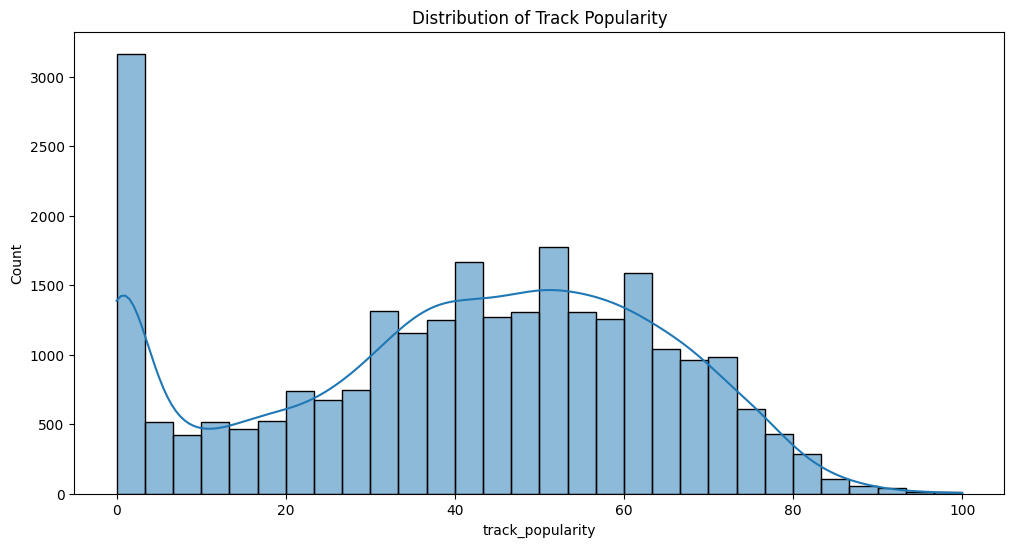

In [16]:
# Track Popularity Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()


In [18]:
# Get numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()



In [19]:
# Check for NaN values
print(numeric_df.isnull().sum())

# Fill NaN values or drop them
numeric_df.fillna(0, inplace=True)  # or use a different strategy


track_popularity    0
released_year       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
liveness            0
valence             0
tempo               0
duration            0
dtype: int64


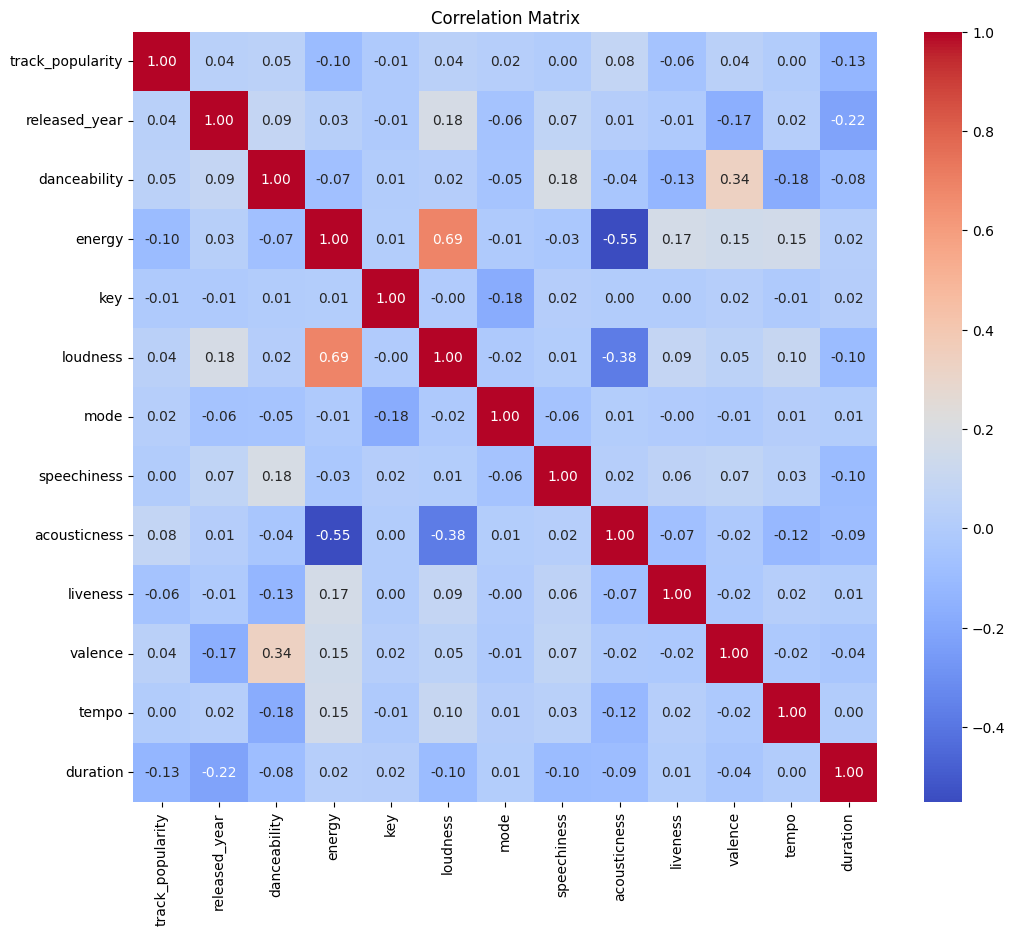

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
